In [149]:
import pandas as pd
import numpy as np
import itertools
from datetime import datetime,timedelta,date
from collections import defaultdict
from sklearn.metrics import mean_absolute_error, mean_squared_error

import colorlover as cl
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [236]:
#df = pd.read_csv('../features/clear_data/rm_features.csv',';',infer_datetime_format=True,index_col=['time','host','consumer_group'],parse_dates=['time'])
#df = pd.read_csv('../features/clear_data/rm_features.csv',';',infer_datetime_format=True,index_col=['time'],parse_dates=['time'])
df = pd.read_csv('../features/clear_data/rm_features.csv',';',infer_datetime_format=True,parse_dates=['time'])

In [237]:
host_cons=[(host,group) for host,group in df.drop_duplicates(['host','consumer_group'])[['host','consumer_group']].values]


In [ ]:
#X_train=pd.DataFrame()
#X_pred=pd.DataFrame()
#for (host,consumer_group) in host_cons:
#    sample=df[(df.host==host)&(df.consumer_group==consumer_group)]
#    X_train=pd.concat([X_train,sample.head(int(len(sample)*0.97))],sort=False)
#    X_pred=pd.concat([X_pred,sample[~sample.index.isin(X_train.index)]],sort=False)
#X_train=X_train.set_index(['time','host','consumer_group'])
#X_pred=X_pred.set_index(['time','host','consumer_group'])

In [ ]:
# Разбить временной ряд на периоды с некоторым окном и свернуть каждый период с помощью PCA

#ts_period=1 # количество дней 
#n_length=24 # количество часов


#def window_stack(a, window=ts_period*n_length):
    # разбиваем данные на окна длиной ts_period
#    X=np.array([a[i:window+i] for i in range(int(len(a) - window))])
#    return X


#from sklearn.decomposition import PCA
#model_PCA = PCA(n_components=1)

#for (host,consumer_group) in host_cons:
#    samples=window_stack(df[(df.host==host)&(df.consumer_group==consumer_group)].set_index(['host','consumer_group']).values)
    #model_PCA.fit_transform(df)
#    for sample in samples:
        

In [185]:

#def predict(model,X):
#    model_predict=pd.DataFrame()
#    for (host,consumer_group) in host_cons:
#        sample=X[(X.host==host)&(X.consumer_group==consumer_group)].set_index(['time','host','consumer_group'])
#        predict=model.fit(sample).predict(sample)
            
#        model_predict=pd.concat([model_predict,pd.DataFrame(predict,columns=['is_anomaly'])],sort=False)
#    return model_predict.reset_index(drop=True)
        


In [283]:

def predict(model,X,mode=0):
    if mode==0:
        return pd.DataFrame(model.fit(X).predict(X),columns=['is_anomaly'])
    else:
        return pd.DataFrame(model.fit_predict(X),columns=['is_anomaly'])
        

In [271]:
outliers_fraction=0.03

## ML models

In [265]:
from sklearn.ensemble import IsolationForest

#rns = np.random.RandomState(42)



#model_IF = IsolationForest(random_state=rns,contamination=outliers_fraction,n_estimators =1000)
#model_IF = IsolationForest(random_state=rns,contamination=0.01,n_estimators =5000,bootstrap =True)
model_IF = IsolationForest(contamination=outliers_fraction,n_estimators =100,bootstrap =True)

#anomaly_IF = predict(model_IF,X_train,X_pred)
#anomaly_IF = predict(model_IF,df)
anomaly_IF = predict(model_IF,df.set_index(['time','host','consumer_group']))


IF_predict=df.reset_index()[['time','host','consumer_group']].join(anomaly_IF[anomaly_IF.is_anomaly==-1],how='right')

In [ ]:
#from sklearn.neighbors import LocalOutlierFactor

#model_LOF = LocalOutlierFactor(n_neighbors=15, contamination=0.01)
#anomaly_LOF = predict(model_LOF,df.set_index(['time','host','consumer_group']),mode=1)

#from sklearn import svm

#model_SVM = svm.OneClassSVM(random_state=rns, nu=outliers_fraction, kernel="rbf", gamma=0.005)
#anomaly_SVM = predict(model_SVM,X_train,X_pred)
#anomaly_SVM = predict(model_SVM,df,df)

#from sklearn.covariance import EllipticEnvelope

#model_EE = EllipticEnvelope(contamination=outliers_fraction)
#anomaly_EE = predict(model_EE,X_train,X_pred)
#anomaly_EE = predict(model_EE,df,df)

#from sklearn.cluster import DBSCAN

#model_DBSCAN = DBSCAN(eps=4, min_samples=20)
#anomaly_DBSCAN = predict(model_DBSCAN,df,mode=1)

#anomaly_DBSCAN[anomaly_DBSCAN.is_anomaly==-1]

#from sklearn.decomposition import PCA

#model_PCA = PCA(n_components=15, svd_solver='full')
#model_PCA.fit_transform(df)

#w_components_ = np.ones([model_PCA.n_components_, ])
#selected_components_ = model_PCA.components_[-1 * model_PCA.n_selected_components_:, :]
#selected_w_components_ = w_components_[-1 * model_PCA.n_selected_components_:]

#tmp=anomaly_IF[anomaly_IF.is_anomaly==-1]\
#    .join(anomaly_SVM[anomaly_SVM.is_anomaly==-1],rsuffix ='_SVM',how='outer')\
#    .join(anomaly_EE[anomaly_EE.is_anomaly==-1],rsuffix ='_EE',how='outer')\
#    .join(anomaly_LOF[anomaly_LOF.is_anomaly==-1],rsuffix ='_LOF',how='outer')\
#    .join(anomaly_DBSCAN[anomaly_DBSCAN.is_anomaly==-1],rsuffix ='_DBSCAN',how='outer')
#tmp=tmp[tmp.sum(axis=1)<-1]
#df_predict=df.reset_index()[['time','host','consumer_group']].join(tmp,how='right')
#df_predict

In [ ]:
#df=pd.concat([df.reset_index(drop=True),anomaly_IF.replace([-1,1],[1,None])],axis=1,sort=False)


In [ ]:
#for (host,consumer_group) in host_cons:
#    sample=df[(df.host==host)&(df.consumer_group==consumer_group)]
#    sample_shift=sample.is_anomaly.shift(1)
#    df.loc[sample_shift.values==1,'is_anomaly']=1
    


## Autoencoders

In [239]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import EarlyStopping

#fields=['host', 'consumer_group', 'time', 'cpu', 'dbtime', 'iowait', 'oth_wait',
#       'pga', 'pxqry', 'pxqtime', 'pxrel', 'read', 'reqs', 'write', 'yields',
#       'sys_actsess_avg', 'sys_actsess_max', 'sys_cpu', 
#       'sys_iowait', 'sys_oswait', 'sys_pga', 'sys_pxqct', 'sys_pxruns',
#       'sys_pxsrvt', 'sys_read', 'sys_redo', 'sys_rmwait', 'sys_syspct',
#       'sys_ucalls', 'sys_write']
X=df.set_index(['time','host','consumer_group'])

dim=X.shape[1]

X_input = Input(shape=(dim,))
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(X_input)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(dim, activation='sigmoid')(decoded)

autoencoder = Model(X_input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

earlystopper = EarlyStopping(monitor='val_loss', patience=5)
autoencoder.fit(X, X,
                    epochs=1000,
                    batch_size=128,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[earlystopper])
autoencoder_predict=autoencoder.predict(X)

rmse=pd.DataFrame(np.sqrt(np.mean(np.power(X.values - autoencoder_predict, 2), axis=1)),columns=['rmse'])
rmse_ae=pd.concat([df.reset_index()[['time','host','consumer_group']],rmse],axis=1,sort=False)

#def autoencoder_fit_predict(model,X):
    

#    model.fit(X, X,
#                    epochs=50,
#                    batch_size=128,
#                    shuffle=True)
#    return model.predict(X)

#autoencoder_predict=pd.DataFrame()
#for (host,consumer_group) in host_cons:
#    sample=df[(df.host==host)&(df.consumer_group==consumer_group)].set_index(['time','host','consumer_group'])

#    sample_decoded=pd.DataFrame(autoencoder_fit_predict(autoencoder,sample),columns=sample.columns)
#    autoencoder_predict=pd.concat([autoencoder_predict,sample_decoded],sort=False)
#autoencoder_predict=pd.concat([df.reset_index()[['time','host','consumer_group']],autoencoder_predict],axis=1,sort=False)

Train on 6300 samples, validate on 1575 samples
Epoch 1/1000
6300/6300 [==============================] - 4s 562us/step - loss: 0.1496 - val_loss: 0.0702
Epoch 2/1000
6300/6300 [==============================] - 0s 65us/step - loss: 0.0443 - val_loss: 0.0318
Epoch 3/1000
6300/6300 [==============================] - 0s 72us/step - loss: 0.0307 - val_loss: 0.0295
Epoch 4/1000
6300/6300 [==============================] - 0s 61us/step - loss: 0.0299 - val_loss: 0.0293
Epoch 5/1000
6300/6300 [==============================] - 0s 61us/step - loss: 0.0292 - val_loss: 0.0276
Epoch 6/1000
6300/6300 [==============================] - 0s 63us/step - loss: 0.0277 - val_loss: 0.0254
Epoch 7/1000
6300/6300 [==============================] - 0s 65us/step - loss: 0.0262 - val_loss: 0.0244
Epoch 8/1000
6300/6300 [==============================] - 0s 66us/step - loss: 0.0250 - val_loss: 0.0229
Epoch 9/1000
6300/6300 [==============================] - 0s 62us/step - loss: 0.0241 - val_loss: 0.0219
Epoch 

(array([737009., 737023., 737037., 737051., 737065., 737079.]),
 <a list of 6 Text xticklabel objects>)

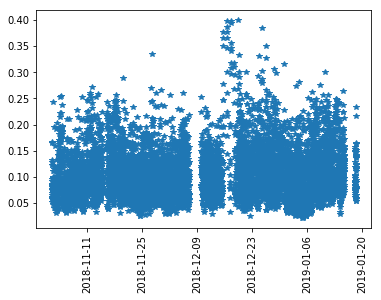

In [253]:
plt.plot(rmse_ae[['time']], rmse_ae[['rmse']], '*')
plt.xticks(rotation='vertical')

## Visualization 

In [281]:
quantile=rmse_ae.rmse.quantile(1-outliers_fraction)
anomaly_predict=rmse_ae[rmse_ae.rmse>quantile].set_index(['time', 'host', 'consumer_group']).join(IF_predict.set_index(['time', 'host', 'consumer_group']),how='inner').reset_index()


In [282]:
def show_forecast(X,metrics,consumer_group,anomaly=None):
# функция для визуализации построенного прогноза

# бага с legend doubleclick

    colors=[color for color in cl.flipper()['seq']['9'].values()]
    data_host=defaultdict(list)

    hosts=X.host.unique()
    for i,host in enumerate(hosts):
        fact_data=[]
        if i==0: 
            ButtonVisible=True
        else: 
            ButtonVisible=False

        anomaly_data = [go.Scatter(
            x=[anomaly[anomaly.host==host].iloc[i].time,anomaly[anomaly.host==host].iloc[i].time+timedelta(hours=1)],
            y=[1,1],
            fill='tozeroy',
            fillcolor='rgba(190,127,188,0.5)',
            line=dict(width=0),
            mode= 'none',
            showlegend=False,
            visible=ButtonVisible
        ) for i in range(len(anomaly[anomaly.host==host]))]
        
        #anomaly_data=go.Scatter(
        #    x=X[X.host==host].time,
        #    y=X[X.host==host].is_anomaly,
        #    fill='tonextx',
        #    fillcolor='rgba(190,127,188,0.5)',
        #    #line=dict(width=0),
        #    #mode= 'none',
        #    showlegend=False,
        #    visible=ButtonVisible
        #)
            
        # фактические значения
        for j,metric in enumerate(metrics):
            
            dash='longdash'
            
            if j%2==0:
                dash='solid'
            elif j%3==0:
                dash='dash'
            elif j%5==0:
                dash='dot'

            
            if (ButtonVisible==True) & (j!=0): 
                ButtonVisible='legendonly'
                
            colorpal=random.randint(0,len(colors)-1)
            fact_data.append(go.Scatter(
                name=str(metric),
                #legendgroup=str(metric),     
                #showlegend= False,
                x=X[X.host==host].time,
                y=X[X.host==host][metric].values,
                mode='lines',
                line=dict(color=colors[colorpal][i+3],
                          dash=dash,
                          width=2
                           ),
                visible=ButtonVisible
                )) 

        data_host[host]=list(filter(None.__ne__,[*fact_data,*anomaly_data]))
        #data_host[host]=list(filter(None.__ne__,[*fact_data,anomaly_data]))

    updatemenus = list([
    dict(type="buttons",
         x = -0.07,
         buttons=list([
        dict(label='Host '+str(hostname),
          method = 'update',
          args = [
              {'visible':list(itertools.chain.from_iterable([([True]+(len(metrics)-1)*['legendonly']+(len(values)-len(metrics))*[True]) if host==hostname else len(values)*[False] for host,values in data_host.items()]
          )) },
             ])
        for i,hostname in enumerate(hosts) 
         ])
        )
 ])


    layout = dict(title=consumer_group, 
                  showlegend=True,
                  updatemenus=updatemenus,

                  xaxis=dict(
                      range=['2018-11-12','2018-11-14'],
                      rangeselector=dict(
                          buttons=list([
                              dict(count=1,
                                   label='1d',
                                   step='day',
                                   stepmode='backward'),
                              dict(count=7,
                                   label='1w',
                                   step='day',
                                   stepmode='backward'),
                              dict(count=1,
                                   label='1m',
                                   step='month',
                                   stepmode='backward'),
                              dict(step='all',
                                   stepmode='backward')
                          ]),
                      ),
                      rangeslider=dict(
                          visible = True
                      ),
                      type='date'
                  ),
                  yaxis=dict(
                      ticks='outside',
                      zeroline=False
                  ),
                 )
    #print(list(itertools.chain.from_iterable([value for key,value in data_host.items()])))
    return dict(data=list(itertools.chain.from_iterable([value for key,value in data_host.items()])), layout=layout)

   

metrics=['cpu', 'dbtime', 'iowait', 'oth_wait',
'pga', 'pxqry', 'pxqtime', 'pxrel', 'read', 'reqs', 'write',
'yields', 'sys_actsess_avg', 'sys_actsess_max', 'sys_cpu', #'sys_dbtime',
'sys_iowait', 'sys_oswait', 'sys_pga', 'sys_pxqct', 'sys_pxruns',
'sys_pxsrvt', 'sys_read', 'sys_redo', 'sys_rmwait', 'sys_syspct',
'sys_ucalls', 'sys_write'
#, 'pxenq'        
        ]

#metrics=['cpu', 'iowait', 'oth_wait']

consumer_group='szb_sandbox_group'
fig_reqs=show_forecast(df[df.consumer_group==consumer_group],metrics,consumer_group,anomaly_predict[anomaly_predict.consumer_group==consumer_group])
iplot(fig_reqs)